In [1251]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

aapl = yf.Ticker("AAPL")

aapl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [1252]:
aapl_hist = aapl.history(start="2022-01-01", end='2024-03-31')
aapl_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,175.597028,180.583619,175.478539,179.724533,104487900,0.0,0.0
2022-01-04 00:00:00-05:00,180.336774,180.642879,176.870839,177.443558,99310400,0.0,0.0
2022-01-05 00:00:00-05:00,177.354699,177.907665,172.447104,172.723587,94537600,0.0,0.0
2022-01-06 00:00:00-05:00,170.531448,173.098806,169.484760,169.840240,96904000,0.0,0.0
2022-01-07 00:00:00-05:00,170.719078,171.953382,168.882433,170.008118,86709100,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 00:00:00-04:00,171.759995,173.050003,170.059998,172.279999,71106600,0.0,0.0
2024-03-25 00:00:00-04:00,170.570007,171.940002,169.449997,170.850006,54288300,0.0,0.0
2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0,0.0


In [1253]:
aapl_hist.reset_index(inplace=True)
print(aapl_hist)

                         Date        Open        High         Low       Close  \
0   2022-01-03 00:00:00-05:00  175.597028  180.583619  175.478539  179.724533   
1   2022-01-04 00:00:00-05:00  180.336774  180.642879  176.870839  177.443558   
2   2022-01-05 00:00:00-05:00  177.354699  177.907665  172.447104  172.723587   
3   2022-01-06 00:00:00-05:00  170.531448  173.098806  169.484760  169.840240   
4   2022-01-07 00:00:00-05:00  170.719078  171.953382  168.882433  170.008118   
..                        ...         ...         ...         ...         ...   
557 2024-03-22 00:00:00-04:00  171.759995  173.050003  170.059998  172.279999   
558 2024-03-25 00:00:00-04:00  170.570007  171.940002  169.449997  170.850006   
559 2024-03-26 00:00:00-04:00  170.000000  171.419998  169.580002  169.710007   
560 2024-03-27 00:00:00-04:00  170.410004  173.600006  170.110001  173.309998   
561 2024-03-28 00:00:00-04:00  171.750000  172.229996  170.509995  171.479996   

        Volume  Dividends  

In [1254]:
aapl_hist['day_difference'] = aapl_hist['Date'].diff().dt.days
aapl_hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,day_difference
0,2022-01-03 00:00:00-05:00,175.597028,180.583619,175.478539,179.724533,104487900,0.0,0.0,NaN
1,2022-01-04 00:00:00-05:00,180.336774,180.642879,176.870839,177.443558,99310400,0.0,0.0,1.0
2,2022-01-05 00:00:00-05:00,177.354699,177.907665,172.447104,172.723587,94537600,0.0,0.0,1.0
3,2022-01-06 00:00:00-05:00,170.531448,173.098806,169.484760,169.840240,96904000,0.0,0.0,1.0
4,2022-01-07 00:00:00-05:00,170.719078,171.953382,168.882433,170.008118,86709100,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
557,2024-03-22 00:00:00-04:00,171.759995,173.050003,170.059998,172.279999,71106600,0.0,0.0,1.0
558,2024-03-25 00:00:00-04:00,170.570007,171.940002,169.449997,170.850006,54288300,0.0,0.0,3.0
559,2024-03-26 00:00:00-04:00,170.000000,171.419998,169.580002,169.710007,57388400,0.0,0.0,1.0
560,2024-03-27 00:00:00-04:00,170.410004,173.600006,170.110001,173.309998,60273300,0.0,0.0,1.0


In [1255]:
aapl_hist['day_difference'].value_counts()

day_difference
1.0    442
3.0     94
4.0     19
2.0      6
Name: count, dtype: int64

In [1256]:
data = aapl_hist['Close']
data

0      179.724533
1      177.443558
2      172.723587
3      169.840240
4      170.008118
          ...    
557    172.279999
558    170.850006
559    169.710007
560    173.309998
561    171.479996
Name: Close, Length: 562, dtype: float64

In [1257]:
data.shape

(562,)

In [1258]:
data = np.reshape(data, (len(data), 1))
data.shape

(562, 1)

In [1259]:
data

array([[179.72453308],
       [177.44355774],
       [172.72358704],
       [169.84024048],
       [170.00811768],
       [170.02786255],
       [172.88156128],
       [173.32595825],
       [170.02786255],
       [170.89685059],
       [167.66789246],
       [164.1427002 ],
       [162.44429016],
       [160.37068176],
       [159.59056091],
       [157.77368164],
       [157.68481445],
       [157.22073364],
       [168.1912384 ],
       [172.58534241],
       [172.41749573],
       [173.63201904],
       [170.72895813],
       [170.44223022],
       [169.72047424],
       [172.85466003],
       [174.2882843 ],
       [170.17527771],
       [166.73460388],
       [166.97189331],
       [170.83770752],
       [170.60043335],
       [166.97189331],
       [165.409729  ],
       [162.46342468],
       [158.26145935],
       [160.90127563],
       [162.98742676],
       [163.25437927],
       [161.35609436],
       [164.67810059],
       [164.35180664],
       [161.3263855 ],
       [157

In [1260]:
standaryzator = StandardScaler()
standaryzator.fit(data)
data = standaryzator.transform(data)

# scaler = MinMaxScaler()
# data = scaler.fit_transform(data)
data


array([[ 8.33873564e-01],
       [ 7.07508187e-01],
       [ 4.46023170e-01],
       [ 2.86286601e-01],
       [ 2.95586949e-01],
       [ 2.96680810e-01],
       [ 4.54774897e-01],
       [ 4.79394362e-01],
       [ 2.96680810e-01],
       [ 3.44822497e-01],
       [ 1.65939146e-01],
       [-2.93554893e-02],
       [-1.23446916e-01],
       [-2.38324224e-01],
       [-2.81542694e-01],
       [-3.82197283e-01],
       [-3.87120499e-01],
       [-4.12830442e-01],
       [ 1.94932361e-01],
       [ 4.38364457e-01],
       [ 4.29065799e-01],
       [ 4.96350041e-01],
       [ 3.35521303e-01],
       [ 3.19636660e-01],
       [ 2.79651586e-01],
       [ 4.53284576e-01],
       [ 5.32706947e-01],
       [ 3.04847567e-01],
       [ 1.14235228e-01],
       [ 1.27380994e-01],
       [ 3.41545988e-01],
       [ 3.28401067e-01],
       [ 1.27380994e-01],
       [ 4.08375417e-02],
       [-1.22386869e-01],
       [-3.55174538e-01],
       [-2.08929476e-01],
       [-9.33573050e-02],
       [-7.8

In [1261]:
window_size =10

X, y = [], []

for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, 0])
    y.append(data[i, 0])

X[:2]

[array([0.83387356, 0.70750819, 0.44602317, 0.2862866 , 0.29558695,
        0.29668081, 0.4547749 , 0.47939436, 0.29668081, 0.3448225 ]),
 array([0.70750819, 0.44602317, 0.2862866 , 0.29558695, 0.29668081,
        0.4547749 , 0.47939436, 0.29668081, 0.3448225 , 0.16593915])]

In [1262]:
X, y = np.array(X), np.array(y)
X[:2]

array([[0.83387356, 0.70750819, 0.44602317, 0.2862866 , 0.29558695,
        0.29668081, 0.4547749 , 0.47939436, 0.29668081, 0.3448225 ],
       [0.70750819, 0.44602317, 0.2862866 , 0.29558695, 0.29668081,
        0.4547749 , 0.47939436, 0.29668081, 0.3448225 , 0.16593915]])

In [1263]:
X.shape

(552, 10)

In [1264]:
train_split = 0.6
validation_split = 0.2
test_split = 0.2

train_split_index = int(len(data) * train_split)
validation_split_index = int(len(data) * (train_split + validation_split))

X_train = X[:train_split_index]
Y_train = y[:train_split_index]
X_validation = X[train_split_index:validation_split_index]
Y_validation = y[train_split_index:validation_split_index]
X_test = X[validation_split_index:]
Y_test = y[validation_split_index:]

print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru walidacyjnego:", len(X_validation))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 337
Rozmiar zbioru walidacyjnego: 112
Rozmiar zbioru testowego: 103


In [1265]:
X_train[:2]

array([[0.83387356, 0.70750819, 0.44602317, 0.2862866 , 0.29558695,
        0.29668081, 0.4547749 , 0.47939436, 0.29668081, 0.3448225 ],
       [0.70750819, 0.44602317, 0.2862866 , 0.29558695, 0.29668081,
        0.4547749 , 0.47939436, 0.29668081, 0.3448225 , 0.16593915]])

In [1266]:
dates = aapl_hist['Date']
dates = dates.dt.date
dates

0      2022-01-03
1      2022-01-04
2      2022-01-05
3      2022-01-06
4      2022-01-07
          ...    
557    2024-03-22
558    2024-03-25
559    2024-03-26
560    2024-03-27
561    2024-03-28
Name: Date, Length: 562, dtype: object

In [1267]:
dates = dates[window_size:]
print(len(dates))

552


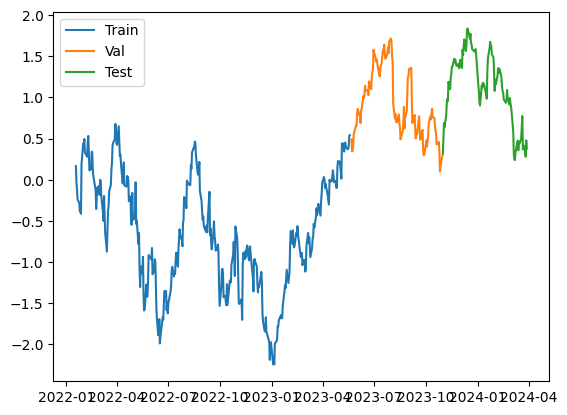

In [1268]:
plt.plot(dates[:train_split_index], Y_train)
plt.plot(dates[train_split_index:validation_split_index],Y_validation)
plt.plot(dates[validation_split_index:], Y_test)
plt.legend(['Train', 'Val', 'Test'])

In [1269]:
dates = np.array([str(date) for date in dates])
dates

array(['2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
       '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
       '2022-02-03', '2022-02-04', '2022-02-07', '2022-02-08',
       '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-14',
       '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
       '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
       '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
       '2022-03-04', '2022-03-07', '2022-03-08', '2022-03-09',
       '2022-03-10', '2022-03-11', '2022-03-14', '2022-03-15',
       '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-21',
       '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
       '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
       '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
       '2022-04-07', '2022-04-08', '2022-04-11', '2022-04-12',
       '2022-04-13', '2022-04-14', '2022-04-18', '2022-

In [1270]:
indices = np.arange(len(Y_train))
np.random.seed(42)
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]

In [1271]:
X_train.shape

(337, 10)

In [1272]:
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.LSTM(units=50))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=20, activation='tanh'))
model_lstm.add(tf.keras.layers.Dropout(0.2))
model_lstm.add(tf.keras.layers.Dense(units=1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_lstm.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_lstm = model_lstm.fit(X_train, Y_train, epochs=100, batch_size=1, 
                              validation_data=(X_validation, Y_validation), 
                              callbacks=[early_stopping])

/home/rol3ert99/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_100 (LSTM)                 │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_150 (Dropout)           │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_101 (LSTM)                 │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_151 (Dropout)           │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_152 (Dropout)           │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,641 (123.60 KB)

 Trainable params: 31,641 (123.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2064 - mae: 0.3442 - val_loss: 0.0718 - val_mae: 0.2323
Epoch 2/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1080 - mae: 0.2685 - val_loss: 0.0638 - val_mae: 0.2129
Epoch 3/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0933 - mae: 0.2455 - val_loss: 0.1003 - val_mae: 0.2683
Epoch 4/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0902 - mae: 0.2372 - val_loss: 0.0541 - val_mae: 0.1723
Epoch 5/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0717 - mae: 0.2056 - val_loss: 0.0591 - val_mae: 0.2016
Epoch 6/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0715 - mae: 0.2074 - val_loss: 0.0298 - val_mae: 0.1396
Epoch 7/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0634 - mae: 0.1993 - val_loss: 0.0602 - val_mae: 0.2111
Epoch 8/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0571 - mae: 0.1908 - val_loss: 0.0320 - val_mae: 0.1470
Epoch 9/100
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/

In [1273]:
model_lstm.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mae: 0.0907  


[0.020714569836854935, 0.09558470547199249]

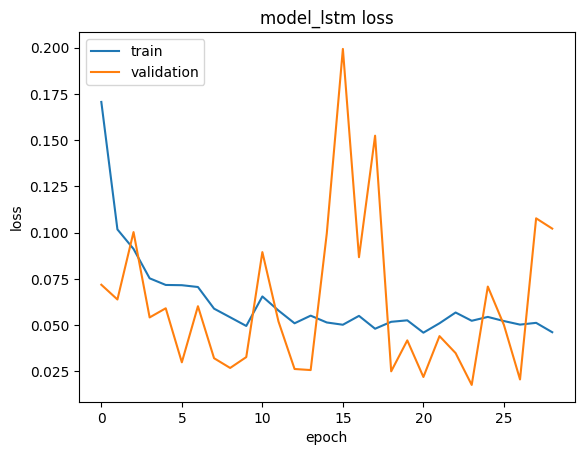

In [1274]:
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model_lstm loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


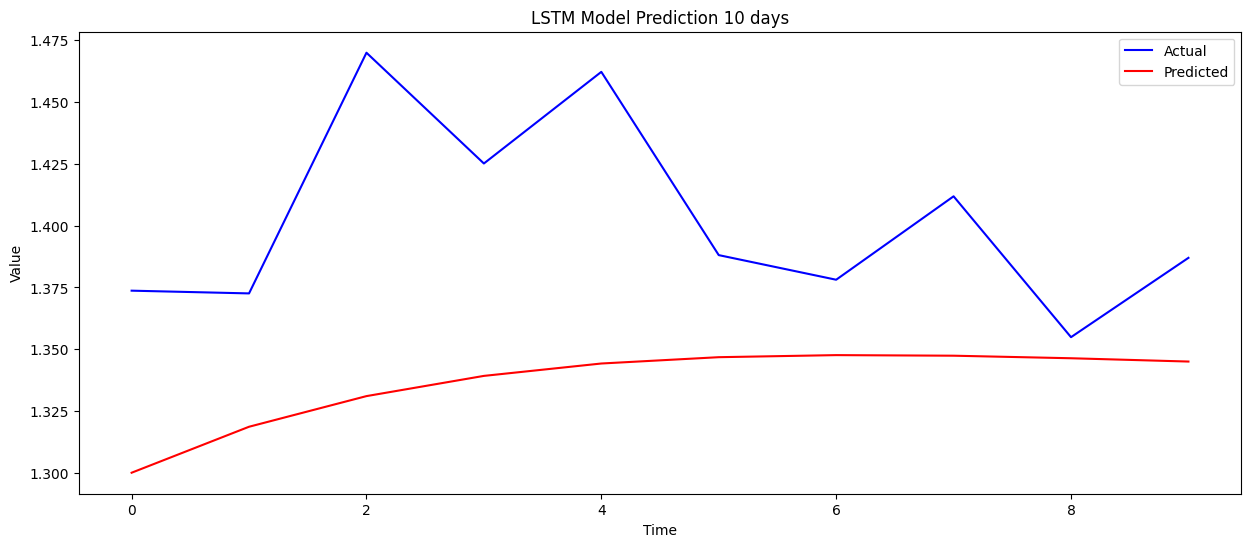

In [1275]:
predictions = []
num_predictions = 10

current_window = X_test[12].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

plt.figure(figsize=(15, 6))
plt.plot(Y_test[12:num_predictions+12], label='Actual', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.title('LSTM Model Prediction 10 days')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()